In [1]:
import pandas as  pd 
import plotly.express as px
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
fifa_df=pd.read_csv("CompleteDataset.csv")

C:\Users\jimv6\AppData\Local\Temp\ipykernel_23128\2634026765.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df=pd.read_csv("CompleteDataset.csv")


 Removing Positionwise OVR

In [5]:
players_data=fifa_df.drop(['Unnamed: 0','Photo', 'Flag','Club Logo', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],axis=1)

Function to remove certain character data from the Number values

In [6]:
import re

def extract_numeric_value(data):


    match = re.search(r'(\d+)', data) 
    if match:
        return int(match.group(1))
    else:
        return None

In [7]:
for item in ['Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','GK diving','GK handling','GK kicking','GK positioning','GK reflexes','Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys','Free kick accuracy','Penalties']:
    players_data[item] = players_data[item].astype('str')
    players_data[item] = players_data[item].apply(lambda x: extract_numeric_value(x))
    players_data[item] = players_data[item].astype('int64')
    


Convert currency format to numeric

In [8]:
def clean_currency_value(val):
    if val[-1]=='M':
        return(float(val[1:-1])*1000000)
    elif val[-1]=='K':
        return(float(val[1:-1])*1000)
    else:
        return(float(val[1:]))



In [9]:
players_data['Value']=players_data['Value'].apply(lambda x:clean_currency_value(x))
players_data['Wage']=players_data['Wage'].apply(lambda x:clean_currency_value(x))

Select the first Preffered Position as Default Position

In [10]:
players_data['Position']=players_data['Preferred Positions'].apply(lambda x:x.split()[0])

Set Player Category based on position

In [11]:
player_categories={'GK':['GK'],
                   'DEF':['CB','LB','RB', 'RWB', 'LWB'],
                   'ATT':['ST', 'RW', 'LW','CF'],
                   'MID':['CDM', 'RM', 'CM', 'LM','CAM']
                   }

In [12]:
def set_category(pos):
    for key,value in player_categories.items():
        if pos in value:
            return key

In [13]:
players_data['Category']=players_data['Position'].apply(lambda x:set_category(x))

In [17]:
players_data[players_data['Category']=='GK']

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Position,Category
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493,58,...,11,61,44,10,83,70,11,GK,GK,GK
6,De Gea,26,Spain,90,92,Manchester United,64500000.0,215000.0,1458,57,...,13,58,40,21,64,68,13,GK,GK,GK
12,T. Courtois,25,Belgium,89,92,Chelsea,59000000.0,190000.0,1282,46,...,16,52,38,18,70,44,12,GK,GK,GK
18,G. Buffon,39,Italy,89,89,Juventus,4500000.0,110000.0,1335,49,...,11,43,39,11,69,50,17,GK,GK,GK
20,J. Oblak,24,Slovenia,88,93,Atlético Madrid,57000000.0,82000.0,1290,43,...,18,60,41,12,78,55,13,GK,GK,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17945,A. Dillon,20,Republic of Ireland,48,61,Blackburn Rovers,50000.0,1000.0,833,30,...,14,25,23,12,45,26,12,GK,GK,GK
17949,M. McElhinney,19,Republic of Ireland,48,60,Derry City,40000.0,1000.0,874,37,...,15,41,28,12,49,25,12,GK,GK,GK
17951,M. Hurst,21,Scotland,48,58,St. Johnstone FC,40000.0,1000.0,991,40,...,16,42,33,15,58,20,14,GK,GK,GK
17976,A. Kelsey,17,England,46,63,Scunthorpe United,50000.0,1000.0,755,24,...,10,32,28,11,50,26,6,GK,GK,GK


In [15]:
players_data.nunique()

Name                   16975
Age                       29
Nationality              165
Overall                   49
Potential                 48
Club                     647
Value                    207
Wage                     142
Special                 1396
Acceleration              86
Aggression                85
Agility                   83
Balance                   83
Ball control              88
Composure                 85
Crossing                  87
Curve                     86
Dribbling                 93
Finishing                 92
Free kick accuracy        88
GK diving                 76
GK handling               72
GK kicking                84
GK positioning            78
GK reflexes               75
Heading accuracy          91
Interceptions             89
Jumping                   74
Long passing              85
Long shots                89
Marking                   88
Penalties                 87
Positioning               93
Reactions                 67
Short passing 

In [16]:
players_data = players_data.drop(['Name','Nationality', 'Club', 'Preferred Positions'], axis = 1)


[<Axes: > <Axes: >]


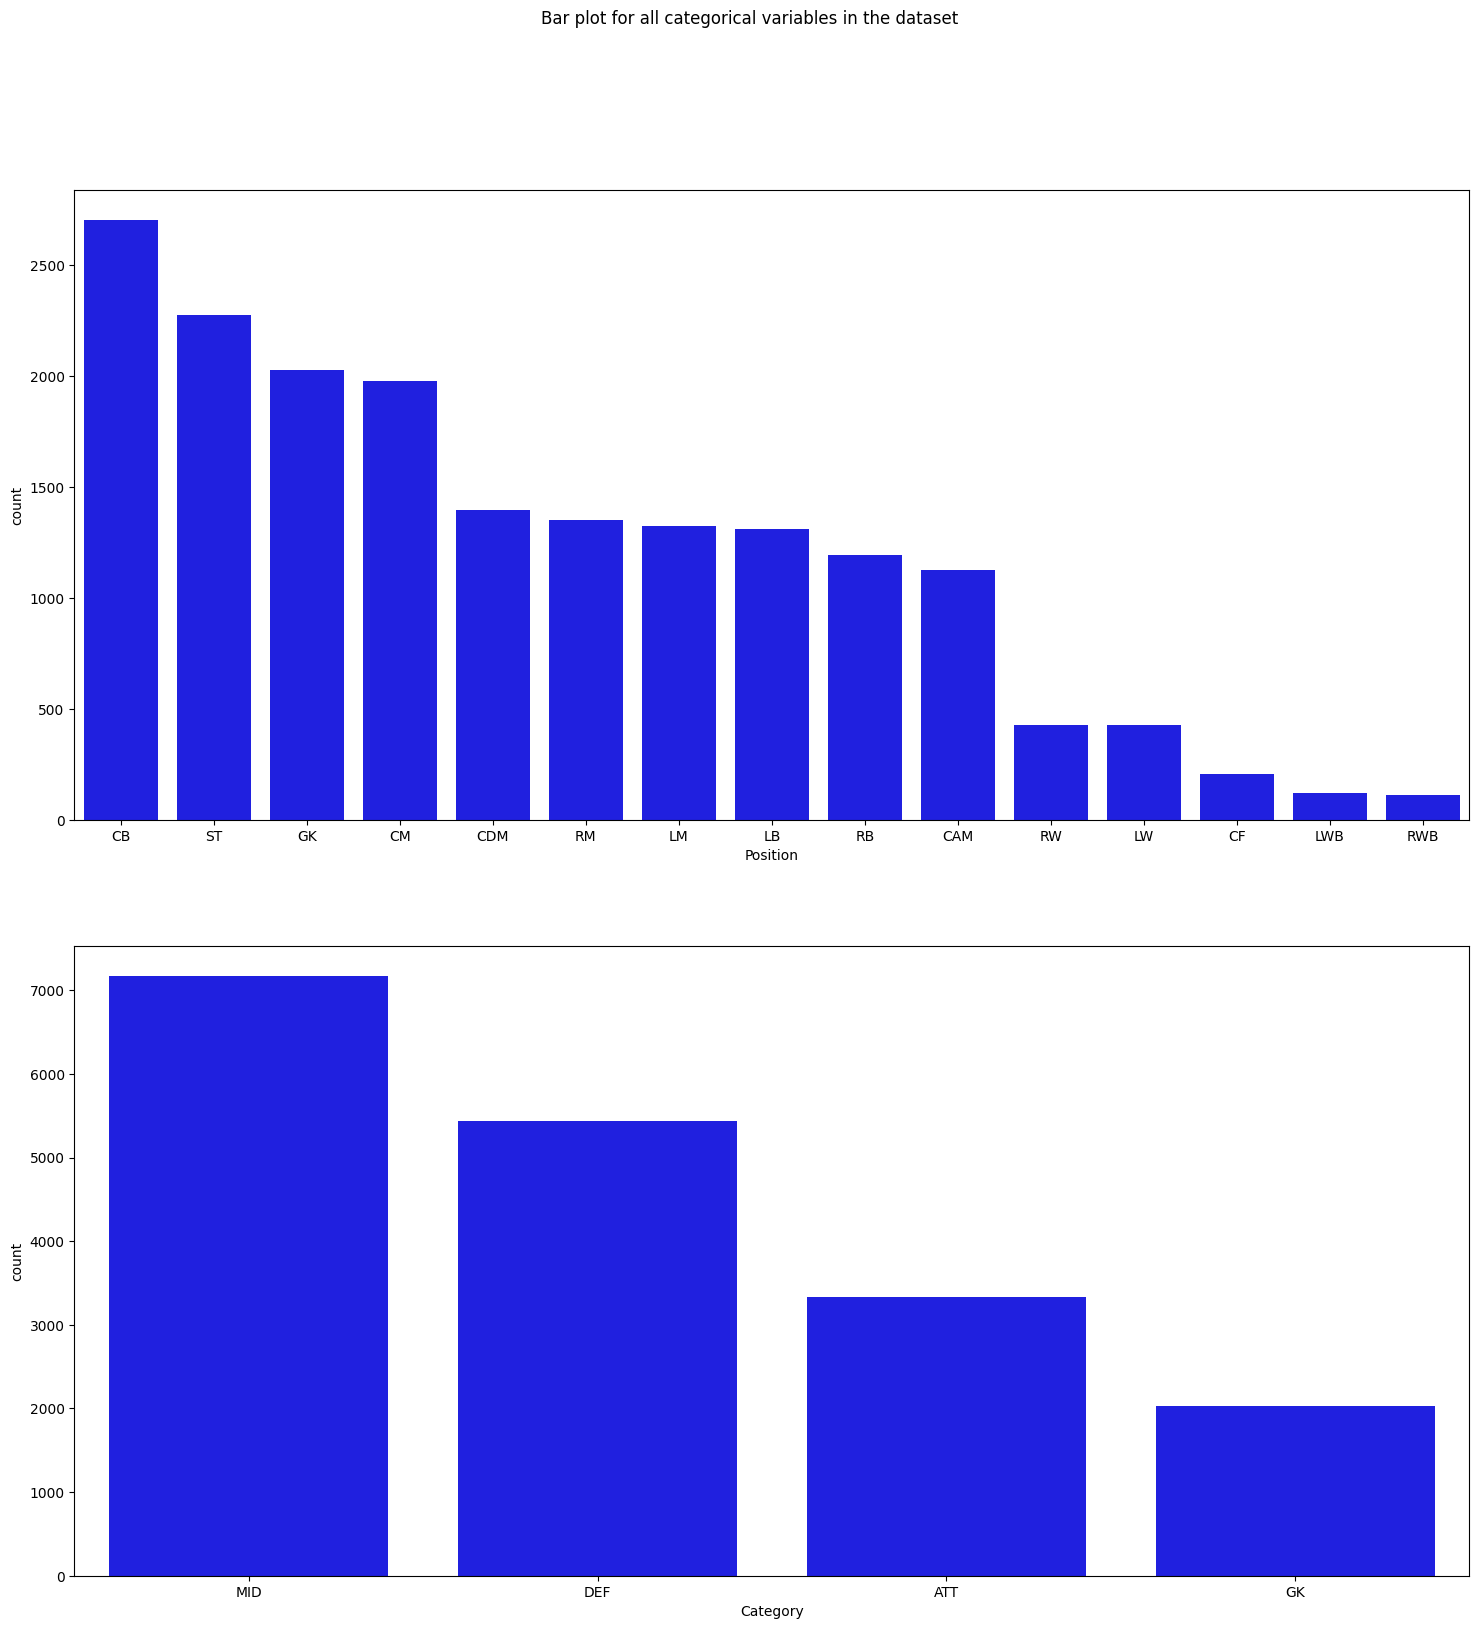

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (18, 18))
print(axes)
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'Position', data = players_data, color = 'blue', 
              order = players_data['Position'].value_counts().index);
sns.countplot(ax = axes[ 1], x = 'Category', data = players_data, color = 'blue', 
              order = players_data['Category'].value_counts().index);


In [18]:
players_data.head()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position,Category
0,32,94,94,95500000.0,565000.0,2228,89,63,89,63,...,94,23,91,92,31,80,85,88,ST,ATT
1,30,93,93,105000000.0,565000.0,2154,92,48,90,95,...,85,26,87,73,28,59,90,85,RW,ATT
2,25,92,94,123000000.0,280000.0,2100,94,56,96,82,...,80,33,90,78,24,53,80,83,LW,ATT
3,30,92,92,97000000.0,510000.0,2291,88,78,86,60,...,87,38,77,89,45,80,84,88,ST,ATT
4,31,92,92,61000000.0,230000.0,1493,58,29,52,35,...,25,11,61,44,10,83,70,11,GK,GK


In [19]:
cat_cols=players_data.select_dtypes(include=['object']).columns.tolist()
num_cols = players_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Position', 'Category']
Numerical Variables:
['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']


In [20]:
target='Value'
features=list(players_data.columns)
features.remove('Value')
# features

In [21]:
X=players_data[features]
y=players_data[target]

In [22]:
cat_cols=X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Position', 'Category']
Numerical Variables:
['Age', 'Overall', 'Potential', 'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']


In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

one_hot_encoded = encoder.fit_transform(players_data[cat_cols])
encoded_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_cols))

In [24]:
encoded_data

,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST,Category_ATT,Category_DEF,Category_GK,Category_MID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17977,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
17979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_cols=[i for i in num_cols if i!='Value']
players_data[scale_cols]=scaler.fit_transform(players_data[scale_cols])

In [26]:
players_data

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position,Category
0,0.516129,1.000000,1.000000,95500000.0,1.000000,0.959693,0.917647,0.611765,0.914634,0.611765,...,1.000000,0.218391,0.941176,0.963855,0.306818,0.790698,0.892857,0.965517,ST,ATT
1,0.451613,0.979167,0.979167,105000000.0,1.000000,0.912348,0.952941,0.435294,0.926829,0.988235,...,0.901099,0.252874,0.894118,0.734940,0.272727,0.546512,0.952381,0.931034,RW,ATT
2,0.290323,0.958333,1.000000,123000000.0,0.495575,0.877799,0.976471,0.529412,1.000000,0.835294,...,0.846154,0.333333,0.929412,0.795181,0.227273,0.476744,0.833333,0.908046,LW,ATT
3,0.451613,0.958333,0.958333,97000000.0,0.902655,1.000000,0.905882,0.788235,0.878049,0.576471,...,0.923077,0.390805,0.776471,0.927711,0.465909,0.790698,0.880952,0.965517,ST,ATT
4,0.483871,0.958333,0.958333,61000000.0,0.407080,0.489443,0.552941,0.211765,0.463415,0.282353,...,0.241758,0.080460,0.588235,0.385542,0.068182,0.825581,0.714286,0.080460,GK,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,0.032258,0.000000,0.354167,50000.0,0.001770,0.017274,0.152941,0.058824,0.292683,0.176471,...,0.175824,0.068966,0.247059,0.192771,0.079545,0.441860,0.190476,0.022989,GK,GK
17977,1.000000,0.000000,0.000000,0.0,0.001770,0.066539,0.164706,0.388235,0.256098,0.388235,...,0.109890,0.103448,0.164706,0.240964,0.090909,0.406977,0.083333,0.091954,GK,GK
17978,0.032258,0.000000,0.312500,60000.0,0.001770,0.298145,0.647059,0.176471,0.560976,0.776471,...,0.428571,0.114943,0.470588,0.253012,0.147727,0.232558,0.321429,0.333333,ST,ATT
17979,0.064516,0.000000,0.375000,60000.0,0.001770,0.367242,0.541176,0.411765,0.536585,0.741176,...,0.439560,0.494253,0.552941,0.445783,0.500000,0.395349,0.488095,0.241379,CM,MID


In [27]:
data=pd.concat([players_data,encoded_data],axis=1)

In [28]:
data=data.drop(['Position','Category'],axis=1)

In [29]:
shuffled_data=data.sample(frac=1, random_state=42).reset_index(drop=True)
train_df=shuffled_data.iloc[:-(len(data)//5)]
test_df=shuffled_data.iloc[-(len(data)//5):]
print(train_df.shape,test_df.shape)

(14385, 59) (3596, 59)


In [30]:
from sklearn.model_selection import train_test_split


In [31]:
train,val=train_test_split(train_df,test_size=0.25)

In [32]:
val

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST,Category_ATT,Category_DEF,Category_GK,Category_MID
9286,0.290323,0.625000,0.666667,9500000.0,0.035398,0.735765,0.776471,0.364706,0.841463,0.694118,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2953,0.161290,0.479167,0.729167,1500000.0,0.024779,0.260397,0.352941,0.152941,0.243902,0.376471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
448,0.129032,0.291667,0.479167,280000.0,0.001770,0.456814,0.611765,0.376471,0.414634,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13598,0.322581,0.333333,0.395833,375000.0,0.001770,0.637236,0.623529,0.623529,0.756098,0.670588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12223,0.129032,0.416667,0.583333,825000.0,0.001770,0.577735,0.882353,0.458824,0.853659,0.870588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,0.354839,0.416667,0.437500,600000.0,0.003540,0.616123,0.517647,0.870588,0.536585,0.517647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12086,0.193548,0.354167,0.458333,500000.0,0.003540,0.592450,0.858824,0.447059,0.670732,0.764706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9810,0.258065,0.354167,0.500000,425000.0,0.001770,0.513756,0.729412,0.447059,0.670732,0.576471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7996,0.322581,0.437500,0.479167,775000.0,0.001770,0.440819,0.505882,0.658824,0.548780,0.576471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
target='Value'
features=list(train.columns)
features.remove('Value')



In [34]:
X_train=train[features]
y_train=train[target]

X_val=val[features]
y_val=val[target]

X_test=test_df[features]
y_test=test_df[target]

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_percentage_error

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
train_pred=model.predict(X_train)
# training_accuracy=accuracy_score(train_pred,y_train)S
train_rmse=np.sqrt(mean_squared_error(train_pred,y_train))
train_mape=mean_absolute_percentage_error(train_pred,y_train)
print(f"Train_RMSE: {train_rmse}\nTrain_MAPE: {train_mape}")

Train_RMSE: 2512135.954806855
Train_MAPE: 8.558008190683645e+17


In [37]:
val_pred=model.predict(X_val)
val_rmse=np.sqrt(mean_squared_error(val_pred,y_val))
val_rmse

2725367.2088774554

In [38]:
test_pred=model.predict(X_test)
test_rmse=np.sqrt(mean_squared_error(test_pred,y_test))
test_rmse

2549792.02420332

In [59]:
prediction_data=pd.DataFrame([test_pred,y_test])
prediction_data['index']=['Prediction','Actual']
prediction_data.set_index('index',inplace=True)

In [60]:
chart_data=prediction_data.T

In [61]:
chart_data

index,Prediction,Actual
0,-98816.0,190000.0
1,-22528.0,260000.0
2,3464704.0,1600000.0
3,3687936.0,1100000.0
4,5567488.0,2400000.0
...,...,...
3591,16384.0,375000.0
3592,130048.0,475000.0
3593,1304576.0,1800000.0
3594,9555968.0,8000000.0


In [62]:
import plotly.express as px 


In [63]:
px.scatter(data=chart_data,x='Prediction',y='Actual')

TypeError: scatter() got an unexpected keyword argument 'data'

In [1]:
prediction_data

NameError: name 'prediction_data' is not defined